In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)
lat_lngs 


In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

80

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a293a63a97dc00a97973ba034d28ed77


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "portland"
city_weather = requests.get(city_url)
city_weather
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -70.25, 'lat': 43.66},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 37.74,
  'pressure': 1015,
  'humidity': 55,
  'temp_min': 32,
  'temp_max': 46},
 'visibility': 16093,
 'wind': {'speed': 3.36, 'deg': 190},
 'clouds': {'all': 1},
 'dt': 1573439549,
 'sys': {'type': 1,
  'id': 5454,
  'country': 'US',
  'sunrise': 1573385297,
  'sunset': 1573420896},
 'timezone': -18000,
 'id': 4975802,
 'name': 'Portland',
 'cod': 200}

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
len(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rungata
City not found. Skipping...
Processing Record 2 of Set 1 | yirol
City not found. Skipping...
Processing Record 3 of Set 1 | riyadh
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 8 of Set 1 | northam
Processing Record 9 of Set 1 | frederikssund
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | ahipara
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | half moon bay
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | marrakesh
Processing Record 17 of Set 1 | canavieiras
Processing Record 18 of Set 1 | sangar
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | san cristobal
Processing 

68

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Riyadh,24.63,46.72,71.60,53,75,3.36,SA,2019-11-11 02:40:51
1,Faanui,-16.48,-151.75,80.20,73,100,7.70,PF,2019-11-11 02:42:13
2,Tiksi,71.64,128.87,-6.69,97,100,2.04,RU,2019-11-11 02:30:47
3,Northam,-31.65,116.67,73.40,43,0,12.75,AU,2019-11-11 02:42:13
4,Frederikssund,55.84,12.06,44.01,93,100,9.17,DK,2019-11-11 02:42:14
5,Tuktoyaktuk,69.44,-133.03,14.00,72,5,19.46,CA,2019-11-11 02:42:14
6,Albany,42.65,-73.75,44.60,52,90,3.36,US,2019-11-11 02:32:33
7,Ahipara,-35.17,173.16,60.01,100,100,21.50,NZ,2019-11-11 02:42:14
8,Tasiilaq,65.61,-37.64,37.40,90,100,54.13,GL,2019-11-11 02:42:14
9,Half Moon Bay,37.46,-122.43,64.00,76,1,10.29,US,2019-11-11 02:42:15


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df= city_data_df[new_column_order] 
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Riyadh,SA,2019-11-11 02:40:51,24.63,46.72,71.60,53,75,3.36
1,Faanui,PF,2019-11-11 02:42:13,-16.48,-151.75,80.20,73,100,7.70
2,Tiksi,RU,2019-11-11 02:30:47,71.64,128.87,-6.69,97,100,2.04
3,Northam,AU,2019-11-11 02:42:13,-31.65,116.67,73.40,43,0,12.75
4,Frederikssund,DK,2019-11-11 02:42:14,55.84,12.06,44.01,93,100,9.17
...,...,...,...,...,...,...,...,...,...
63,Zarubino,RU,2019-11-11 02:42:26,42.65,131.06,51.24,66,100,25.37
64,El Sauzal,AR,2019-11-11 02:42:27,-24.30,-64.96,73.40,73,75,0.85
65,Wajima,JP,2019-11-11 02:42:27,37.40,136.90,55.40,66,75,1.12
66,Fort Frances,CA,2019-11-11 02:41:50,48.61,-93.40,7.00,84,75,3.36


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/10/19'

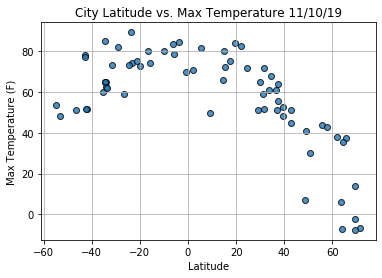

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

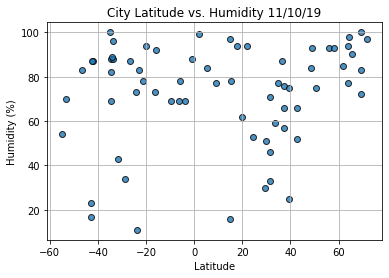

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

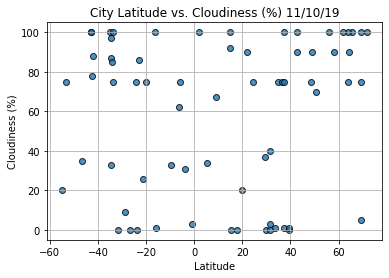

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

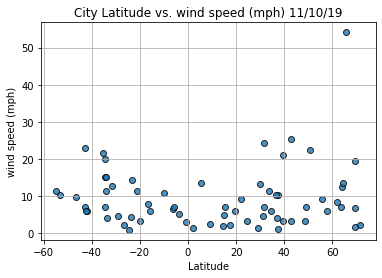

In [22]:
#Now, we can create our last scatter plot! Let’s repurpose 
#the code we have been using and change the y-axis variable to “wind speed,” 
#the title to “Wind Speed,” and the y-axis label to “Wind Speed (mph).”

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind speed (mph) "+ time.strftime("%x"))
plt.ylabel("wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(f"regression ")
    
    plt.show()


In [25]:
index13=city_data_df.loc[13]
index13

City                       Sangar
Country                        RU
Date          2019-11-11 02:42:15
Lat                         63.92
Lng                        127.47
Max Temp                    -7.01
Humidity                       94
Cloudiness                    100
Wind Speed                  12.44
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      True
1     False
2      True
3     False
4      True
      ...  
63     True
64    False
65     True
66     True
67     True
Name: Lat, Length: 68, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Riyadh,SA,2019-11-11 02:40:51,24.63,46.72,71.60,53,75,3.36
2,Tiksi,RU,2019-11-11 02:30:47,71.64,128.87,-6.69,97,100,2.04
4,Frederikssund,DK,2019-11-11 02:42:14,55.84,12.06,44.01,93,100,9.17
5,Tuktoyaktuk,CA,2019-11-11 02:42:14,69.44,-133.03,14.00,72,5,19.46
6,Albany,US,2019-11-11 02:32:33,42.65,-73.75,44.60,52,90,3.36
8,Tasiilaq,GL,2019-11-11 02:42:14,65.61,-37.64,37.40,90,100,54.13
9,Half Moon Bay,US,2019-11-11 02:42:15,37.46,-122.43,64.00,76,1,10.29
11,Marrakesh,MA,2019-11-11 02:42:15,31.63,-7.99,51.80,71,3,6.93
13,Sangar,RU,2019-11-11 02:42:15,63.92,127.47,-7.01,94,100,12.44
15,San Cristobal,HN,2019-11-11 02:42:16,14.68,-86.92,66.00,97,100,1.77


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-32-8c4f0e57bb27>, line 6)

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

NameError: name 'linregress' is not defined

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))